# __Feature maps of VGG19__

### __Deep Learning__

#### __Project: Image Captioning with Visual Attention__

In [1]:
import os
os.chdir(os.environ["PYTHONPATH"])

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import torch
from torchvision.models import vgg19
from torchvision import datasets as dset

import scripts.data_utils as du

%matplotlib inline
%load_ext autoreload
%autoreload 2


plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["image.cmap"] = "plasma"

In [2]:
VGG19 = vgg19(pretrained=True)
coco = du.load_dataset(du.DatasetType.Validation, vgg_preprocessed=True)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [3]:
encoder = VGG19.features[:-1]

In [4]:
encoder.children

<bound method Module.children of Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): 

In [5]:
image, _ = coco[1]
image = image.unsqueeze(0)

In [6]:
encoder_output = encoder.forward(image)[0]
encoder_output = encoder_output.detach()
encoder_output.shape

torch.Size([512, 14, 14])

<AxesSubplot:title={'center':'Feature map obtain from kernel number = 11'}>

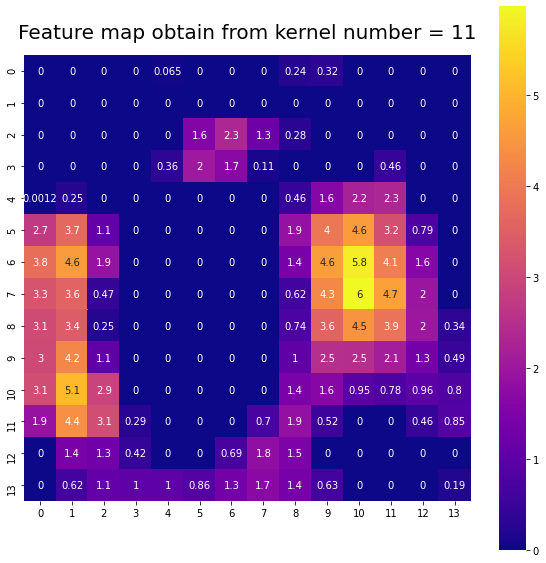

In [7]:
feature_map_index = 11

feature_map = encoder_output[feature_map_index]
    
plt.title(f"Feature map obtain from kernel number = {feature_map_index}", fontsize=20, y=1.025)
sns.heatmap(feature_map, annot=True, square=True, cmap=plt.rcParams["image.cmap"])

In [8]:
FEATURE_MAP_DIR_PATH = os.path.join(os.getcwd(), "images", "feature_maps")
os.makedirs(FEATURE_MAP_DIR_PATH, exist_ok=True)

for index, feature_map in enumerate(encoder_output):
    plt.grid("off")
    sns.heatmap(
        feature_map, 
        annot=True, 
        square=True, 
        cbar=False,
        cmap=plt.rcParams["image.cmap"], 
        xticklabels=False, 
        yticklabels=False,
    )
    
    output_path = os.path.join(FEATURE_MAP_DIR_PATH, f"feature_map{index}")
    plt.savefig(output_path)
    plt.clf()

<Figure size 720x720 with 0 Axes>